In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve

from src.data.load_data import read_params, read_data
from src.models.smote import preproc_cenario, balancing_pipe

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:.4f}'.format

Lendo dados


In [4]:
config = read_params(config_path="../params.yaml")

safra_config = config["proc_data_config"]["safra_config"]
shuffle_config = config["proc_data_config"]["shuffle_config"]

In [5]:
x_shuffle_test = read_data('../'  + shuffle_config["x_test_csv"])
y_shuffle_test = read_data('../'  + shuffle_config["y_test_csv"])

x_safra_test = read_data('../'  + safra_config["x_test_csv"])
y_safra_test = read_data('../'  + safra_config["y_test_csv"])

In [6]:
validacao = ['shuffle', 'safra']
balanceamento = ['bbagg', 'smote']
modelos = ['logistica', 'knn', 'decision_tree', 'random_forest', 'gradient_boosting']
cenario = ['cenario0', 'cenario1','cenario2', 'cenario3']

Mexendo com modelos treinados, retornados pelos objetos do GridSearchCV
 - Abrindo objeto grid treinado

AUC: (oito gráficos para shuffle + oito para safra, totalizando 16 gráficos)
 - Shuffle:

   - G1SH: Gráfico 1 SHuffle:
     - Quatro gráficos de curva ROC com balanceamento BBAGG:
        1. bbagg, cenario0: Todos os cinco modelos
        2. bbagg, cenario1: Todos os cinco modelos
        3. bbagg, cenario2: Todos os cinco modelos
        4. bbagg, cenario3: Todos os cinco modelos
   - G2SH: Gráfico 2 SHuffle:
     - Quatro gráficos de curva ROC com balanceamento SMOTE:
        1. smote, cenario0: Todos os cinco modelos
        2. smote, cenario1: Todos os cinco modelos
        3. smote, cenario2: Todos os cinco modelos
        4. smote, cenario3: Todos os cinco modelos

In [43]:
validacao = 'safra'
print(f"validacao: {validacao}\nbalanceamento: {balanceamento}\ncenario: {cenario}\nmodelos: {modelos}")

validacao: safra
balanceamento: ['bbagg', 'smote']
cenario: ['cenario0', 'cenario1', 'cenario2', 'cenario3']
modelos: ['logistica', 'knn', 'decision_tree', 'random_forest', 'gradient_boosting']


In [48]:
# ROC CURVE
roc_pred = []
result_table = pd.DataFrame(columns=['validacao', 'balanceamento', 'cenario', 'classifiers', 'fpr','tpr','auc'])

if validacao == 'shuffle':

    x_test = x_shuffle_test
    y_test = y_shuffle_test

    for i, balance_method in enumerate(balanceamento):
        for j, cenario_j in enumerate(cenario):
            for k, modelo_k in enumerate(modelos):
                pkl_file = '/home/cayan/Documentos/Trabalhos/pd_imbalanced/models/' + validacao + '/' + validacao + '_' + balance_method + '_mod' +  str(k) + '_' + cenario_j + '.pkl'
                #print(pkl_file)

                with open(pkl_file, 'rb') as handle:
                    grid_mod = pickle.load(handle)

                y_pred = grid_mod.predict_proba(x_test)[:, 1]
                fpr, tpr, _ = roc_curve(y_test, y_pred)
                auc = round(roc_auc_score(y_test, y_pred), 4)

                result_table = result_table.append({
                    'validacao': validacao,
                    'balanceamento': balance_method,
                    'cenario':cenario_j,
                    'classifiers':modelo_k,
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc}, ignore_index=True);

if validacao == 'safra':

    x_test = x_safra_test.drop(columns='safra_contrato')
    y_test = y_safra_test

    for i, balance_method in enumerate(balanceamento):
        for j, cenario_j in enumerate(cenario):
            for k, modelo_k in enumerate(modelos):
                pkl_file = '/home/cayan/Documentos/Trabalhos/pd_imbalanced/models/' + validacao + '/' + validacao + '_' + balance_method + '_mod' +  str(k) + '_' + cenario_j + '.pkl'
                #print(pkl_file)

                with open(pkl_file, 'rb') as handle:
                    grid_mod = pickle.load(handle)

                y_pred = grid_mod.predict_proba(x_test)[:, 1]
                fpr, tpr, _ = roc_curve(y_test, y_pred)
                auc = round(roc_auc_score(y_test, y_pred), 4)

                result_table = result_table.append({
                    'validacao': validacao,
                    'balanceamento': balance_method,
                    'cenario':cenario_j,
                    'classifiers':modelo_k,
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc}, ignore_index=True);

/tmp/ipykernel_12010/1386767200.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
/tmp/ipykernel_12010/1386767200.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
/tmp/ipykernel_12010/1386767200.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
/tmp/ipykernel_12010/1386767200.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
/tmp/ipykernel_12010/1386767200.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

In [49]:
#mod_names = {'logistica': 'LR', 'knn': 'KNN', 'decision_tree': 'DT', 'random_forest': 'RF', 'gradient_boosting': 'GB'}
#result_table = result_table.replace({'classifiers': mod_names})
result_table.head()
result_table.tail()

,validacao,balanceamento,cenario,classifiers,fpr,tpr,auc
0,safra,bbagg,cenario0,logistica,"[0.0, 0.0001073191672032625, 0.000536595836016...","[0.0, 0.0, 0.0, 0.0016835016835016834, 0.00168...",0.6334
1,safra,bbagg,cenario0,knn,"[0.0, 0.000214638334406525, 0.0004292766688130...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.001683501683501683...",0.6319
2,safra,bbagg,cenario0,decision_tree,"[0.0, 0.0005365958360163126, 0.000858553337626...","[0.0, 0.0, 0.0, 0.003367003367003367, 0.005050...",0.6457
3,safra,bbagg,cenario0,random_forest,"[0.0, 0.0001073191672032625, 0.000536595836016...","[0.0, 0.0, 0.0, 0.003367003367003367, 0.003367...",0.6493
4,safra,bbagg,cenario0,gradient_boosting,"[0.0, 0.0, 0.00042927666881305, 0.001287830006...","[0.0, 0.0016835016835016834, 0.001683501683501...",0.6451


,validacao,balanceamento,cenario,classifiers,fpr,tpr,auc
35,safra,smote,cenario3,logistica,"[0.0, 0.0001073191672032625, 0.003863490019317...","[0.0, 0.0, 0.0, 0.0016835016835016834, 0.00168...",0.6195
36,safra,smote,cenario3,knn,"[0.0, 0.0024683408456750377, 0.006868426701008...","[0.0, 0.0, 0.006734006734006734, 0.02020202020...",0.5765
37,safra,smote,cenario3,decision_tree,"[0.0, 0.347928740072977, 0.38956857694784286, ...","[0.0, 0.5420875420875421, 0.5892255892255892, ...",0.6189
38,safra,smote,cenario3,random_forest,"[0.0, 0.06836230950847821, 0.09626529298132647...","[0.0, 0.09932659932659933, 0.132996632996633, ...",0.6287
39,safra,smote,cenario3,gradient_boosting,"[0.0, 0.3435286542176433, 0.38699291693496457,...","[0.0, 0.5252525252525253, 0.5858585858585859, ...",0.6206


In [65]:
result_table[ (result_table.classifiers == "gradient_boosting") & (result_table.balanceamento == "smote") ]['auc']

24   0.6069
29   0.6393
34   0.6207
39   0.6206
Name: auc, dtype: float64

In [110]:
def plot_roc_cenario(result_table, validacao, balanceamento, cenario):
    
    mod_names = {'logistica': 'LR', 'knn': 'KNN', 'decision_tree': 'DT', 'random_forest': 'RF', 'gradient_boosting': 'GB'}

    df_plot = result_table[ (result_table.validacao == validacao) & (result_table.balanceamento == balanceamento) & (result_table.cenario == cenario)]
    df_plot = df_plot.replace({'classifiers': mod_names})
    df_plot.set_index('classifiers', inplace=True)
    
    if cenario == "cenario0":
        features_removed = 'None'
    elif cenario == "cenario1":
        features_removed = 'Gender'
    elif cenario == "cenario2":
        features_removed = 'Gender, Education'
    elif cenario == "cenario3":
        features_removed = "Gender, Education, Age"
    else:
        features_removed = "Not Valid"

    fig = plt.figure(figsize=(12,9))

    for i in df_plot.index:
        plt.plot(
            df_plot.loc[i]['fpr'], 
            df_plot.loc[i]['tpr'], 
            label=f"{i} ({df_plot.loc[i]['auc']:.3f})"
            )

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1), size=15)
    plt.xlabel("Flase Positive Rate", fontsize=25)

    plt.yticks(np.arange(0.0, 1.1, step=0.1), size=15)
    plt.ylabel("True Positive Rate", fontsize=25)

    plt.title(f'Features Removed:\n{features_removed}', fontsize=25)#, fontweight='bold')
    plt.legend(prop={'size':18}, loc='upper left', frameon=False);
    
    figura = validacao + balanceamento + cenario + '.png'
    fig.savefig(figura)

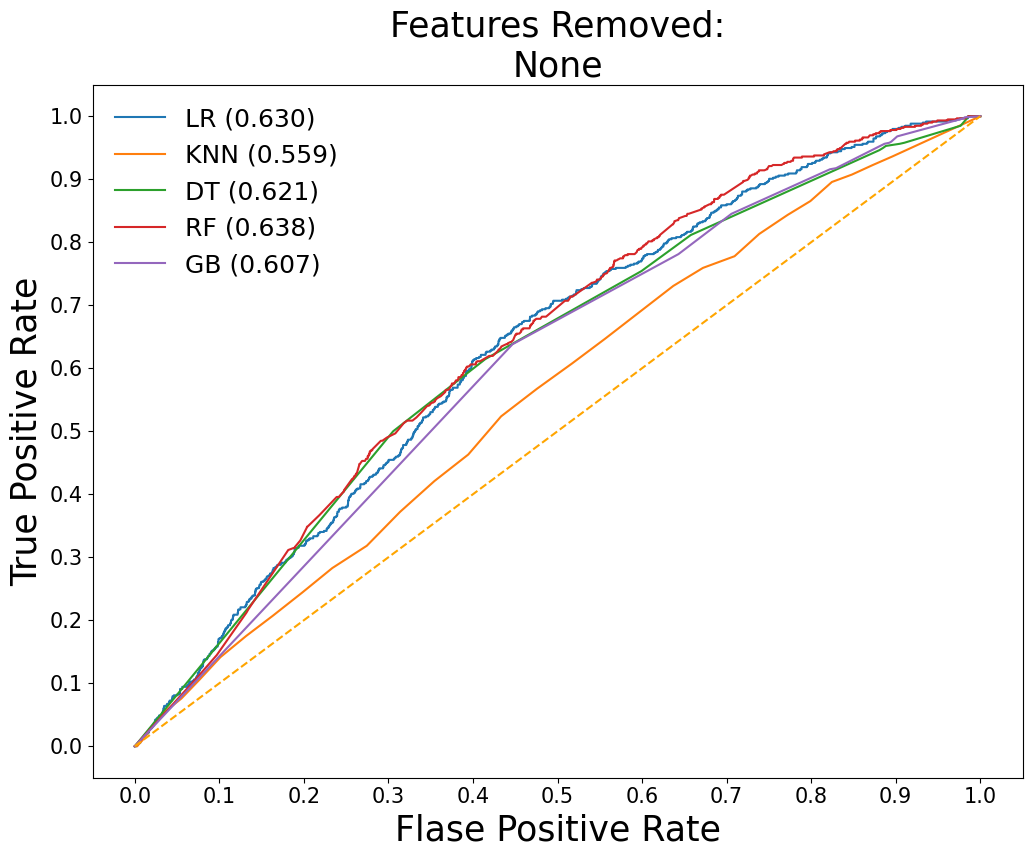

In [109]:
plot_roc_cenario(result_table=result_table, validacao='safra', balanceamento='smote', cenario='cenario0')

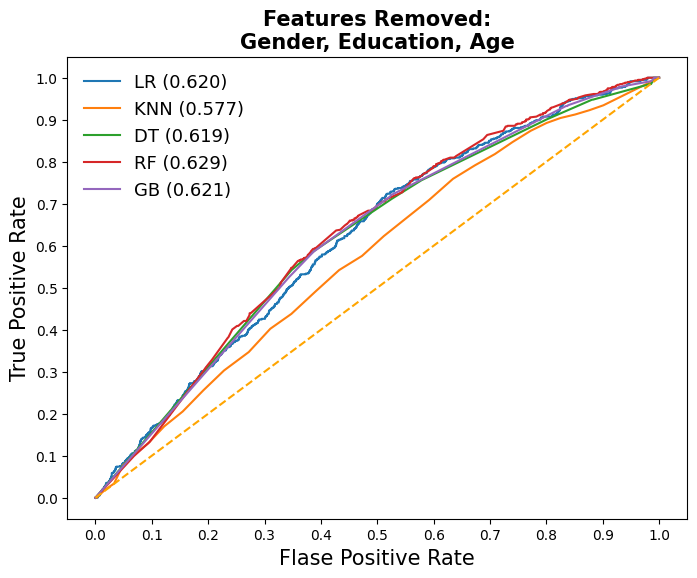

In [75]:
plot_roc_cenario(result_table=result_table, validacao='safra', balanceamento='smote', cenario='cenario3')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


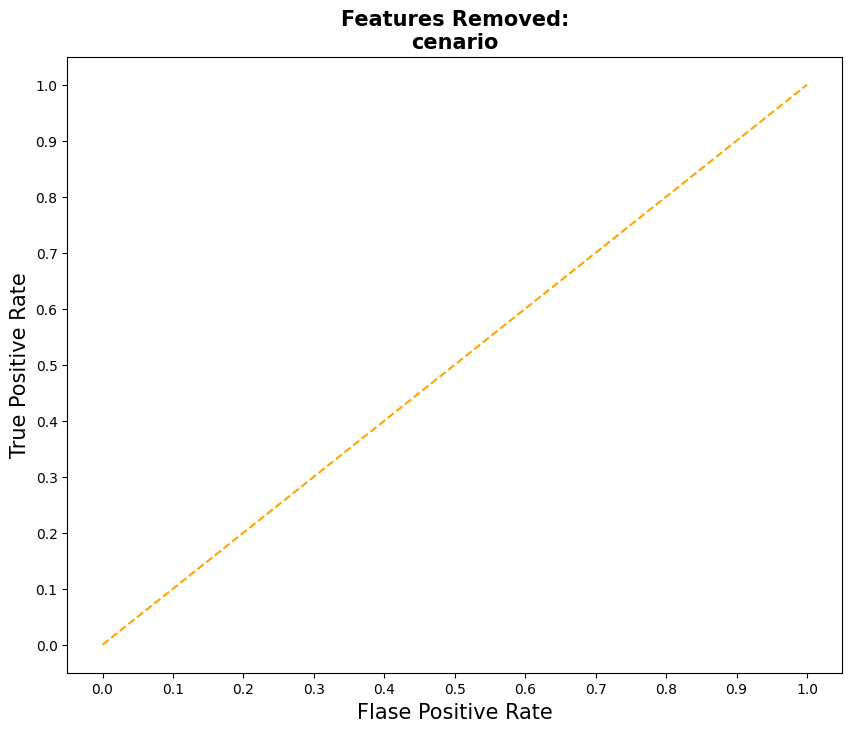

In [80]:
####################################
## grafico isolado, para rascunho ##
####################################

mod_names = {'logistica': 'LR', 'knn': 'KNN', 'decision_tree': 'DT', 'random_forest': 'RF', 'gradient_boosting': 'GB'}

df_plot = result_table[ (result_table.validacao == 'shuffle') & (result_table.balanceamento == 'bbagg') & (result_table.cenario == 'cenario0')]
df_plot = df_plot.replace({'classifiers': mod_names})
df_plot.set_index('classifiers', inplace=True)


features_removed = 'cenario'
fig = plt.figure(figsize=(10,8))

for i in df_plot.index:
        plt.plot(
            df_plot.loc[i]['fpr'], 
            df_plot.loc[i]['tpr'], 
            #label="{}, AUC={:.3f}".format(i, df_plot.loc[i]['auc'])
            label=f"{i} ({df_plot.loc[i]['auc']:.3f})"
            );

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title(f'Features Removed:\n{features_removed}', fontsize=15, fontweight='bold')
plt.legend(prop={'size':13}, loc='upper left', frameon=False);
